<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/DEEP_LEARNING_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
data=pd.read_csv(url)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [119]:
#perform EDA

In [120]:
x = data.drop('quality',axis=1)
y = data['quality']

print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [121]:
#OneHotEncoding
OHE = OneHotEncoder(sparse_output=False)
y_encoded=OHE.fit_transform(y.values.reshape(-1,1))
x_train,x_test,y_train,y_test=train_test_split(x,y_encoded,test_size=0.2,random_state=42)

In [122]:
#Scaling
scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [123]:
#Creating a MLP Model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model=Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,590 (45.27 KB)

 Trainable params: 11,590 (45.27 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=50,validation_split=0.2, verbose =1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3960 - loss: 1.5560 - val_accuracy: 0.5859 - val_loss: 1.0233
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5749 - loss: 1.1078 - val_accuracy: 0.6758 - val_loss: 0.9018
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6172 - loss: 0.9919 - val_accuracy: 0.6758 - val_loss: 0.8913
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6166 - loss: 0.9655 - val_accuracy: 0.6602 - val_loss: 0.8736
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6410 - loss: 0.9244 - val_accuracy: 0.6406 - val_loss: 0.8768
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6248 - loss: 0.9510 - val_accuracy: 0.6836 - val_loss: 0.8341
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6262 - loss: 0.9521 - val_accuracy: 0.6914 - val_loss: 0.8424
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6281 - loss: 0.9381 - val_accuracy: 0.6797 - val_loss

In [125]:
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
opt = SGD(learning_rate=0.01)
#opt = Adagrad(learning_rate=0.01, initial_accumulator_value = 0)
#opt = RMSprop(learning_rate=0.01, rho=0.9)
#opt = Adam(learning_rate=0.01)
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)
#opt = Adam(learning_rate=lr_schedule)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=50,validation_split=0.2, verbose =1)
#find codes at https://github.com/atuvshinjargal/DiveIntoCode

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8281 - loss: 0.4581 - val_accuracy: 0.6367 - val_loss: 0.9934
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.4425 - val_accuracy: 0.6484 - val_loss: 0.9866
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8064 - loss: 0.4945 - val_accuracy: 0.6367 - val_loss: 0.9789
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8204 - loss: 0.4567 - val_accuracy: 0.6250 - val_loss: 0.9863
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8511 - loss: 0.4186 - val_accuracy: 0.6367 - val_loss: 0.9789
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8559 - loss: 0.4295 - val_accuracy: 0.6484 - val_loss: 0.9764
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8413 - loss: 0.4417 - val_accuracy: 0.6406 - val_loss: 1.0007
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8602 - loss: 0.4298 - val_accuracy: 0.6367 - val_loss

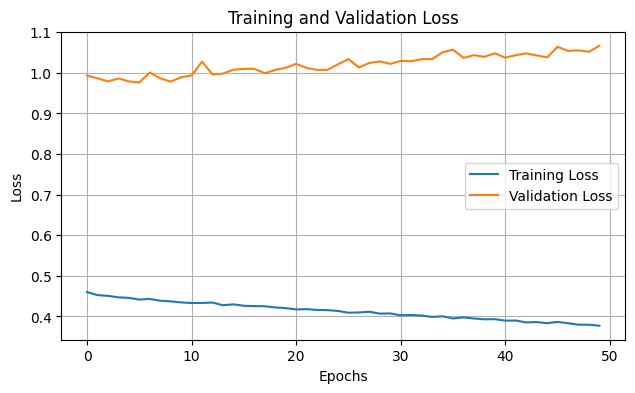

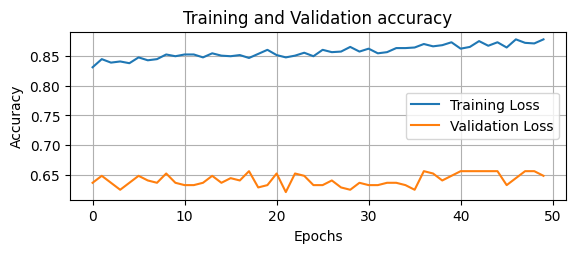

In [126]:
#Plotting training and Validation Loss/Accuracy
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history ['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(history.history ['accuracy'], label = 'Training Loss')
plt.plot(history.history['val_accuracy'], label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [127]:
#Prediction
y_pred=model.predict(x_test).round()
#y_pred=np.argmax(y_pred,axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)


# Import accuracy_score
from sklearn.metrics import accuracy_score

print('Accuracy:',accuracy_score(y_test_labels,y_pred)) # Compare with y_test_labels
print(classification_report(y_test_labels,y_pred)) # Compare with y_test_labels

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.5625
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        10
           2       0.69      0.66      0.67       130
           3       0.61      0.54      0.57       132
           4       0.52      0.52      0.52        42
           5       0.50      0.20      0.29         5

    accuracy                           0.56       320
   macro avg       0.39      0.32      0.34       320
weighted avg       0.61      0.56      0.58       320



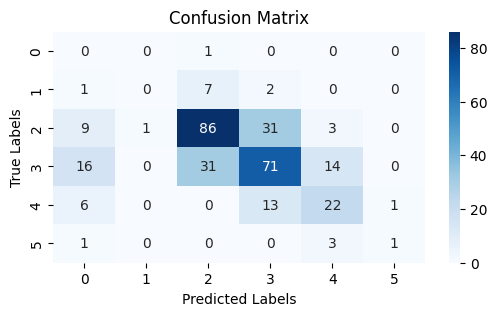

In [128]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()